# Capstone Project Modul 3 - Prediksi Harga Mobil
by : Muhammad Raihan Muhith

# Latar Belakang


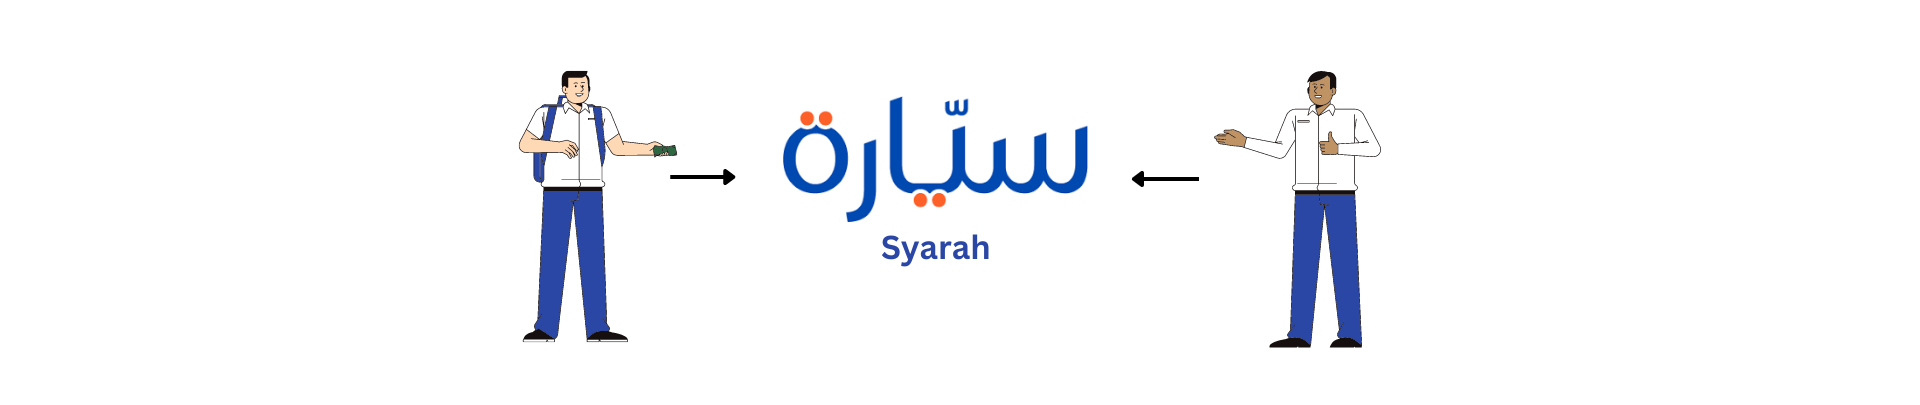

<b>Syarah</b> adalah pasar online untuk menjual mobil di negara Arab Saudi. <b>Syarah</b> memposisikan diri sebagai pihak ketiga atau media dalam mempromosikan penjualan mobil bekas, membantu bisnis dan individu membeli mobil mereka dengan mudah dan secepat mungkin. Sehingga dapat dikatakan terdapat 3 Aktor pada proses bisnisnya, yaitu Syarah, Penjual, dan Pembeli. Penjual akan mengiklankan mobilnya yang ingin dijual melalui Syarah, begitu juga Pembeli yang membeli Mobil bekas yang diiklankan melalui Syarah. Penjual dapat secara bebas mengiklankan Mobilnya dengan mendefinisikan spesifikasi-spesifikasi mobil serta <b> harga</b> untuk diiklankan melalui Syarah. Nah, Hal ini terkadang menyulitkan penjual yang tidak mengetahui kisaran harga mobil bekas di pasaran. Apabila penjual memberikan harga mobil yang terlalu mahal dibanding mobil-mobil lainnya dengan spesifikasi sejenis, khawatir peminat untuk iklan tersebut sedikit atau bahkan tidak ada sama sekali. Sedangkan apabila penjual memberikan harga mobil terlalu murah dibanding mobil-mobil lainnya dengan spesifikasi sejenis, maka penjual akan mendapatkan keuntungan yang tidak sepadan. 

Sebagai Bisnis Owner yaitu Syarah, melihat harga jual mobil yang tidak tepat di pasaran akan berpengaruh juga terhadap perusahaan. Karena salah satu keuntungan yang didapatkan dari bisnis ini adalah biaya iklan dan proporsi keuntungan yang didapat dari penjualan mobil. Jika banyak mobil dengan spesifikasi dikalangannya dijual dengan harga yang terlalu mahal, Pembeli mobil yang melalui situs Syarah akan menurun sehingga keuntungan profit perusahaan juga menurun. Seiring berjalannya waktu, Penjual juga tidak ingin mengiklankan mobil nya di Syarah sebab pengunjung/pembeli situs syarah yang mulai sedikit. Lalu apabila banyak mobil yang dijual dengan harga terlalu murah, perusahaan juga mendapatkan proporsi keuntungan dari penjualan yang kecil.


# Rumusan Masalah & Solusi

Berdasarkan latar belakang, tantangan yang harus diselesaikan oleh Syarah adalah <b>Bagaimana Cara Syarah membantu menentukan harga jual mobil yang tepat untuk penjual berdasarkan spesifikasi mobilnya?</b>. Dengan begitu penjual hanya perlu memasukkan spesifikasi mobilnya dan secara otomatis, Syarah akan menyarankan harga jual dari mobil tersebut. Nantinya pada  situs Syarah akan ada prediction tool untuk memberikan kemudahan kepada penjual agar harga mobil dengan spesifikasi dikalangannya dijual dengan harga yang tepat. Dengan begitu diharapkan masyarakat merasa percaya terhadap harga jual mobil yang diiklankan di Syarah merupakan harga yang tepat sehingga banyak dari sisi pengunjung dan penjual yang bertransaksi melewati Syarah. Dengan kata lain, semakin banyak transaksi artinya semakin tinggi juga revenue perusahaan, dalam konteks ini didapat dari biaya iklan jika dari sisi penjual dan proporsi keuntungan jual dari sisi pembeli.

# Approach

Analisis Regresi, dimana Analisis regresi dalam statistika adalah salah satu metode untuk menentukan hubungan sebab-akibat antara satu variabel dengan variabel yang lain. Analisis Regresi akan dilakukan dengan menggunakan bantuan machine learning. Sehingga yang menemukan karakteristik pembeda harga mobil satu dengan yang lainnya adalah sebuah model machine learning itu sendiri.

# <i>Data Understanding</i>

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pd.set_option('display.max_colwidth', 2000)

In [ ]:
df = pd.read_csv('data_saudi_used_cars.csv')
display(df.head())
print("Dataframe Shape :",df.shape)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


Dataframe Shape : (5624, 11)


Dataset ini berisi 5.624 catatan mobil bekas yang dikumpulkan dari situs syarah.com. Setiap baris mewakili catatan sebuah mobil bekas. Informasi lain (atribut) mengenai setiap mobil adalah nama merek, model, tahun pembuatan, asal, opsi, kapasitas mesin, jenis transmisi, jarak tempuh, harga wilayah, dan dapat dinegosiasikan. Berikut deskripsi tiap atributnya.

- `Type`: Jenis mobil bekas.
- `Region`: Wilayah tempat mobil bekas ditawarkan untuk dijual.
- `Make`: Nama perusahaan.
- `Gear_Type`: Ukuran jenis roda gigi mobil bekas.
- `Origin`: Asal mobil bekas.
- `Options`: Pilihan mobil bekas.
- `Year`: Tahun pembuatan.
- `Engine_Size`: Ukuran mesin mobil bekas.
- `Mileage`: Jarak tempuh mobil bekas (km)
- `Negotiable`: Keterangan harga dapat di negosiasikan atau tidak.
- `Price`: Harga mobil bekas dalam riyal, nilai 0 pada variabel ini diakibatkan oleh Variabel `Negotiable` yang bernilai True (dapat dinegosiasikan).

In [ ]:
# Cek info lebih detail untuk setiap fitur

listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,object,0,0.0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,object,0,0.0,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,0.0,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,0.0,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,float64,0,0.0,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,int64,0,0.0,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [ ]:
# Summary Statistics

print("Describe Numerical Features")
display(df.drop(columns='Year').describe().astype('int64'))
print("Describe Categorical Features Values")
display(df.describe(include=object))
print("Describe Date Feature")
display(pd.to_datetime(df['Year'],format='%Y').describe(datetime_is_numeric=True))

Describe Numerical Features


,Engine_Size,Mileage,Price
count,5624,5624,5624
mean,3,150923,53074
std,1,382835,70155
min,1,100,0
25%,2,38000,0
50%,3,103000,36500
75%,4,196000,72932
max,9,20000000,850000


Describe Categorical Features Values


,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


Describe Date Feature


count                             5624
mean     2014-02-07 01:29:21.593172224
min                1963-01-01 00:00:00
25%                2012-01-01 00:00:00
50%                2016-01-01 00:00:00
75%                2018-01-01 00:00:00
max                2022-01-01 00:00:00
Name: Year, dtype: object

Dapat diketahui bahwa:
1. Dataset ini tidak memiliki satupun <i>missing value</i>.
1. Dataset didominasi oleh Variabel Ketegorik.
1. Harga jual Mobil tertinggi adalah 850000 Riyal (~3,5 Miliyar Rupiah). 
1. Sebanyak 25% dari jumlah data, 0 Riyal didefinisikan oleh penjual sebagai harga jual mobil. Hal ini diakibatkan oleh variabel `Negotiable` yang bernilai True.
1. Jarak Tempuh Tertinggi adalah 20000000 KM. Hal ini merupakan peristiwa yang tidak mungkin.
1. Mobil-mobil yang dijual pada dataset ini adalah mobil yang dibuat pada tahun 1963 - 2022.

# <i>Data Preparation</i>

Proses selanjutnya adalah menyiapkan data yang berkualitas dan yang dapat dimengerti oleh mesin. Proses pada Data preparation antara lain adalah Data Cleaning, Handling Outliers, Binning, Feature Selection, Data Splitting, Encode, dan Scalling.

## Data Cleaning

Data Cleaning, seperti namanya proses ini adalah proses pembersihan data dengan tujuan data yang akan digunakan untuk pemodelan merupakan data yang berkualitas dan valid. Namun, karena berdasarkan proses Data Understanding Dataset ini tidak memiliki satupun <i>missing value</i> bahkan tidak ada nilai yang <i>Typo</i>. Sehingga pada proses ini hanya akan dilakukan pengecekan Duplicate Values & Handling Outliers saja.

In [ ]:
# Cek Duplicate Values

display(df[df.duplicated()])
print(f"Jumlah data yang duplikat: {sum(df.duplicated())} records")

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


Jumlah data yang duplikat: 4 records


tentu saja, data-data yang duplikat akan dihapus saja agar tidak ada data yang berulang.

In [ ]:
# Drop Duplicate Values

df.drop_duplicates(inplace=True)

### Handling Outliers

Data pencilan merupakan sebuah data yang jauh dari nilai rata-rata. Di dunia nyata, memang data pencilan sulit sekali untuk dihindari karena memang terdapat karakteristik data yang dapat dikatakan tidak seperti data-data pada umumnya. Pada kasus ini, dengan alasan untuk meningkatkan kualitas data agar ketika dilakukan pemodelan, hasil prediksi memiliki error yang kecil, maka akan dilakukan pemangkasan outliers berdasarkan base knowledge.

### Kolom Price

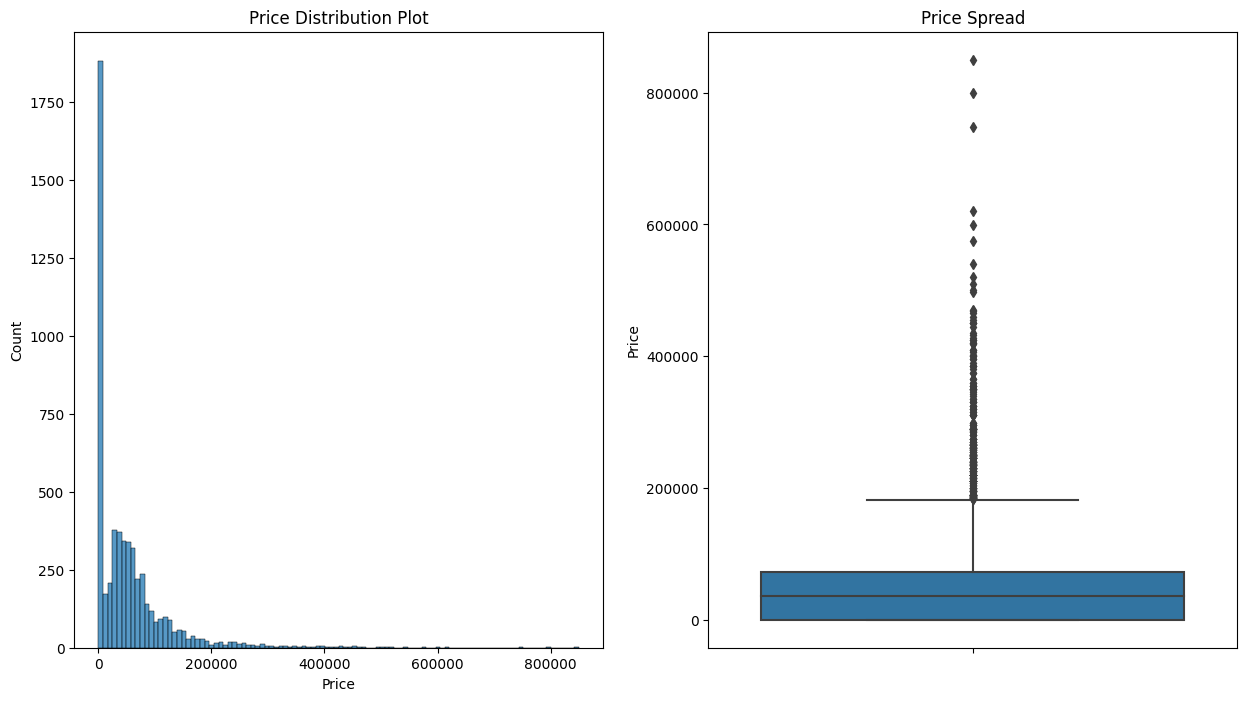

In [ ]:
# Visualizing Price

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.histplot(df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.show()

Dari hasil visualisasi diatas, distribusi data untuk variabel `Price` sangat right skewed, dimana persebaran data terbanyak berada di nilai 0. Jika kita mengingat kembali proses Data Understanding, sebanyak 25% nilai pada kolom `Price` adalah 0. Karena tujuan dari Analisis Regresi ini adalah untuk memprediksi harga jual mobil, terlepas dari harga mobil tersebut bisa di negosiasikan atau tidak, data yang diperlukan adalah data dimana penjual mendefinisikan harga mobilnya secara jelas (bukan 0). Maka dari itu data yang memiliki harga jual sama dengan 0, akan dihapus.

In [ ]:
# Cek Jumlah records dengan Price = 0

df[df['Price'] == 0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [ ]:
# Drop records dengan Price = 0

df = df[df['Price'] != 0]

In [ ]:
# Cek nilai variabel Price

df['Price'].sort_values()

3131         1
3992       500
4399       850
5128       884
3474       950
         ...  
4653    599000
2120    620000
4273    748000
4684    800000
3513    850000
Name: Price, Length: 3824, dtype: int64

Ternyata terdapat nilai yang masih tidak masuk akal untuk dijadikan harga jual Mobil, contoh 1 riyal. Maka dari itu, telah ditentukan threshold minimum untuk harga jual mobil bekas adalah 5000 riyal (~20 juta). Disamping itu, telah ditentukan juga threshold maximum harga jual mobil, yaitu 200000 riyal (~800 juta). Hal ini dilakukan agar distribusi kolom harga tidak terlalu right skewed.

In [ ]:
# Check jumlah data dengan Price < 5000 dan Price > 200000

df[((df['Price'] < 5000) | (df['Price'] > 200000))]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
46,Elantra,Abha,Hyundai,Automatic,Saudi,Semi Full,2020,2.0,27000,False,1010
60,SL,Jeddah,Mercedes,Automatic,Saudi,Full,2017,4.7,81000,False,265000
65,Malibu,Arar,Chevrolet,Automatic,Saudi,Standard,2021,1.5,24000,False,1200
73,Land Cruiser,Qassim,Toyota,Automatic,Saudi,Full,2019,4.5,82808,False,230000
...,...,...,...,...,...,...,...,...,...,...,...
5548,The M,Riyadh,BMW,Automatic,Saudi,Full,2020,6.0,13000,False,385000
5555,S8,Dammam,Audi,Automatic,Gulf Arabic,Full,2016,4.0,42000,False,229000
5573,S,Jeddah,Mercedes,Automatic,Saudi,Semi Full,2015,4.0,157000,False,215000
5601,Macan,Jeddah,Porsche,Automatic,Saudi,Semi Full,2018,2.0,36000,False,210000


In [ ]:
df = df[~((df['Price'] < 5000) | (df['Price'] > 200000))]
df.sort_values(by='Price', ascending=True)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3052,Expedition,Al-Medina,Ford,Automatic,Saudi,Semi Full,2003,5.4,400000,False,5000
3482,Caprice,Riyadh,Chevrolet,Automatic,Saudi,Standard,2006,3.6,380000,False,5000
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,False,5000
2612,Suburban,Aseer,GMC,Automatic,Saudi,Semi Full,1990,3.5,140000,False,5000
693,Accent,Dammam,Hyundai,Manual,Saudi,Standard,2005,1.5,294602,False,5000
...,...,...,...,...,...,...,...,...,...,...,...
4057,LX,Dammam,Lexus,Automatic,Other,Full,2013,5.7,98000,False,200000
4926,LX,Aseer,Lexus,Automatic,Saudi,Full,2015,5.7,248,False,200000
2715,The 7,Riyadh,BMW,Automatic,Saudi,Full,2018,2.0,52000,False,200000
17,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,2019,4.6,71000,False,200000


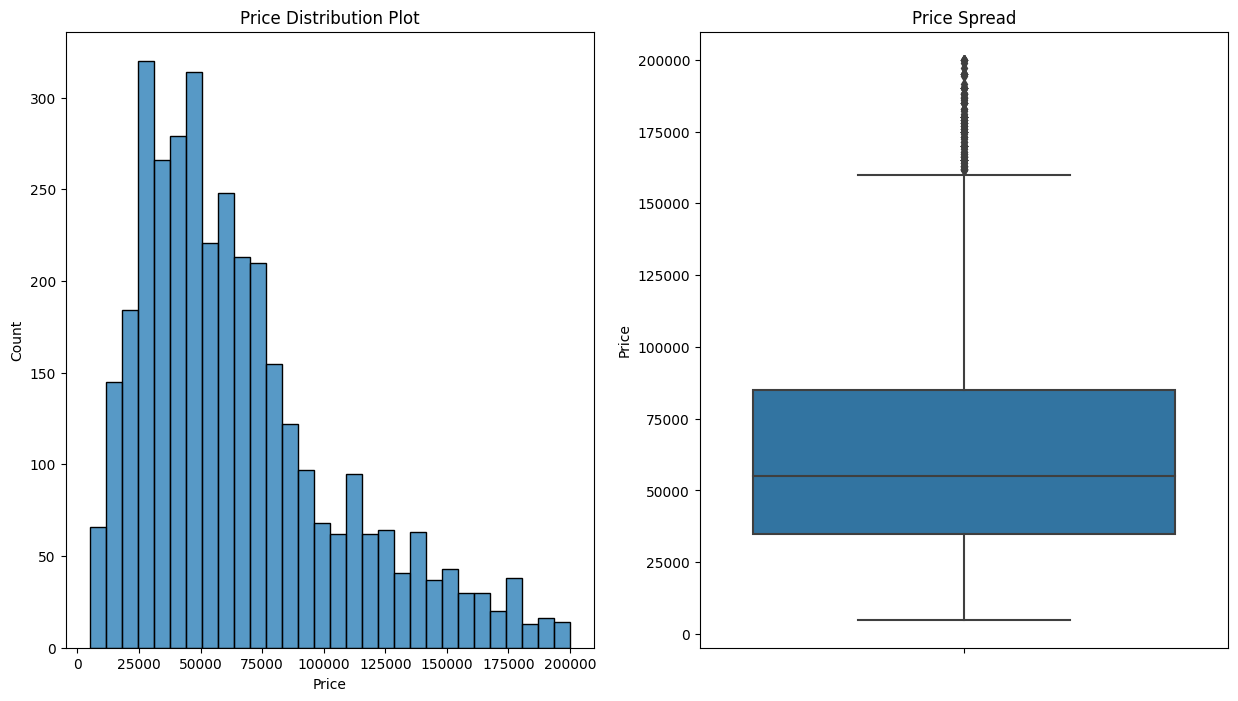

In [ ]:
# Visualizing Price

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.histplot(df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df['Price'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.show()

### Kolom Year

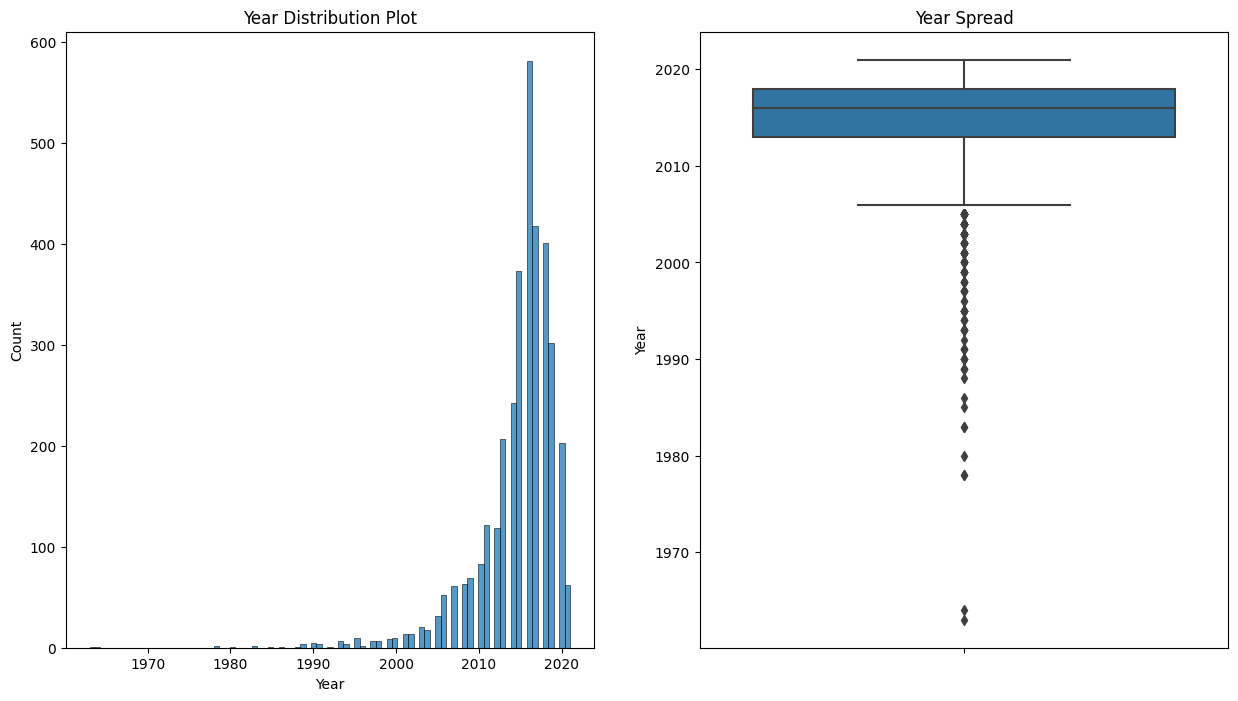

In [ ]:
# Visualizing Year

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Year Distribution Plot')
sns.histplot(df['Year'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Year Spread')
sns.boxplot(y=df['Year'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.show()

Dapat dilihat dari hasil visualisasi diatas, distribusi data dari kolom `Year` adalah left skewed. Mobil yang banyak dijual adalah mobil-mobil dengan rentang tahun pembuatan 2010 - 2020. Hal ini dapat diartikan bahwa mobil-mobil tua jarang dijual (pada kasus ini).

In [ ]:
df['Year'].value_counts().reset_index().sort_values(by='Year',ascending=True)

,index,Year
40,1963,1
34,1986,1
35,1988,1
39,1992,1
37,1985,1
38,1980,1
36,1964,1
33,1978,2
32,1996,2
31,1983,2


Telah dibuktikan dengan tabel diatas, mobil yang dijual dengan tahun pembuatan dibawah tahun 2000 hanya sedikit, contohnya saja mobil keluaran tahun 1963, 1986, 1988, dst. yang dijual hanya ada 1 mobil saja. Dengan begitu, threshold minimum tahun pembuatan mobil adalah tahun 2000.

In [ ]:
# Drop Year < 2000

df = df[df['Year'] >= 2000]

### Kolom Mileage

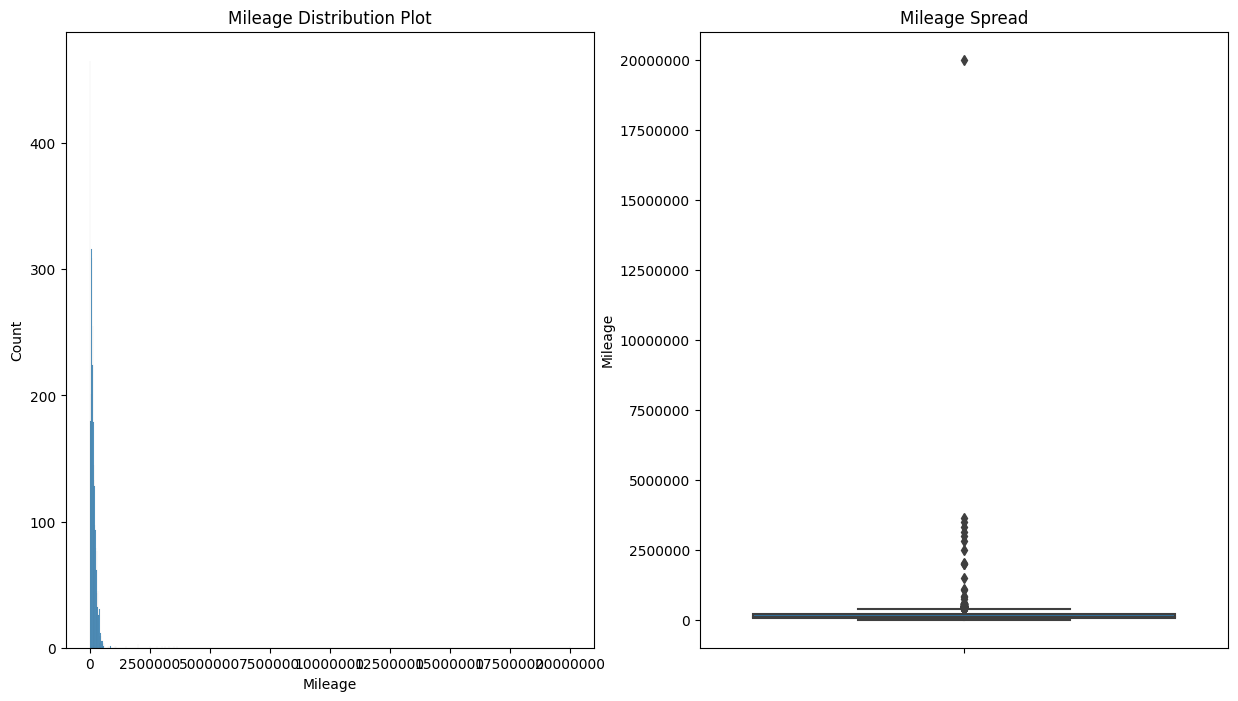

In [ ]:
# Visualizing Mileage

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Mileage Distribution Plot')
sns.histplot(df['Mileage'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Mileage Spread')
sns.boxplot(y=df['Mileage'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.show()

Pada proses Data Understanding telah diketahui bahwa terdapat nilai yang sangat ekstrem pada kolom `Mileage`, yaitu 20000000 Km. Maka dari itu, dengan proses yang sama seperti penghapusan outliers pada kolom `Price`, kita perlu menentukan threshold minimum dan maximum untuk menghapus outliers. Berdasarkan ksa.motory.com, rata-rata jarak tempuh mobil pertahun di Saudi Arabia adalah 16000 miles (~25000 km). Karena pada proses sebelumnya kita membatasi tahun pembuatan mobil hanya mobil yang dibuat dari tahun 2000 keatas, maka sangatlah kecil kemungkinan terdapat mobil dengan jarak tempuh yang lebih dari rata-rata jarak tempuh total selama 23 tahun (sekarang sudah 23 tahun sejak tahun 2000). Sehingga mobil yang memiliki total jarak tempuh diatas 575000 km (25000 x 23), akan dihapus.

In [ ]:
# Cek jumlah records dengan Mileage > 575000

df[df['Mileage'] > 575000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,False,5000
333,Range Rover,Jeddah,Land Rover,Automatic,Saudi,Full,2009,2.4,2013000,False,35000
453,Azera,Riyadh,Hyundai,Automatic,Saudi,Semi Full,2018,3.5,1100000,False,80000
1334,Prado,Makkah,Toyota,Manual,Saudi,Semi Full,2006,4.0,2800000,False,35000
1412,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,False,10000
1609,Yukon,Riyadh,GMC,Automatic,Saudi,Semi Full,2011,1.0,600000,False,36000
2115,Optima,Riyadh,Kia,Automatic,Saudi,Full,2014,2.5,2002500,False,42000
2427,Corolla,Riyadh,Toyota,Manual,Saudi,Standard,2005,1.3,801500,False,14000
2493,Innova,Riyadh,Toyota,Automatic,Gulf Arabic,Standard,2015,2.7,749000,False,46000
3292,Aveo,Makkah,Chevrolet,Automatic,Other,Semi Full,2014,1.6,1500000,False,11000


In [ ]:
# Drop Mileage > 1000000

df = df[df['Mileage'] < 575000]

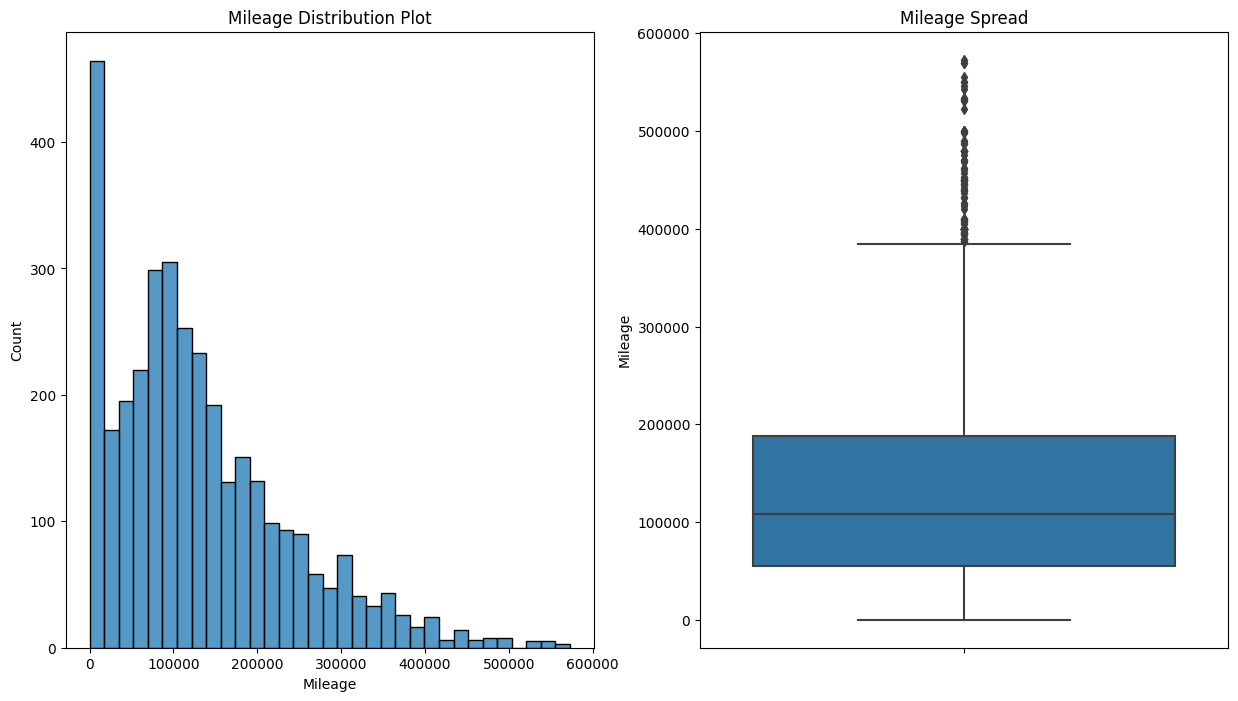

In [ ]:
# Visualizing Mileage

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('Mileage Distribution Plot')
sns.histplot(df['Mileage'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('x'))

plt.subplot(1,2,2)
plt.title('Mileage Spread')
sns.boxplot(y=df['Mileage'])
plt.ticklabel_format(useOffset=False, style='plain', axis=('y'))

plt.show()

## Binning - Aggregation

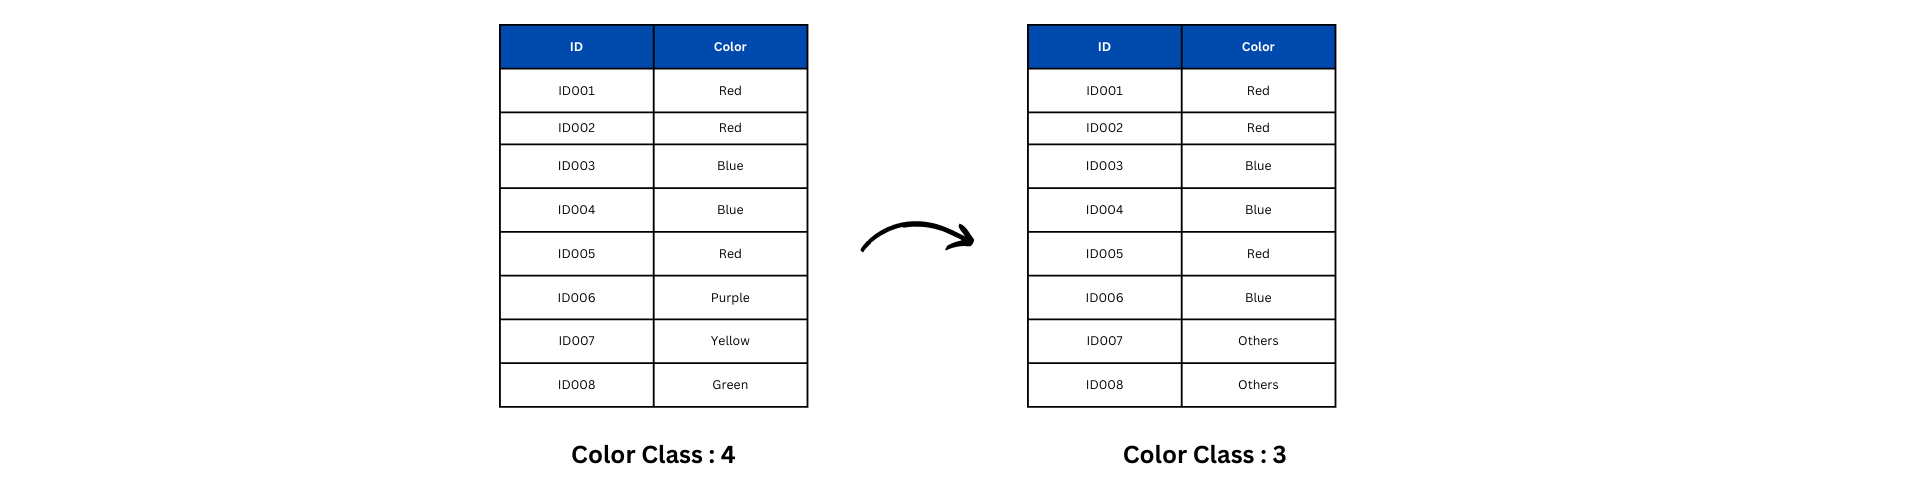

Aggregation digunakan untuk mengelompokkan class-class yang jarang keluar menjadi 1 kelompok. Hal ini digunakan untuk mengatasi tingginya kardinalitas dari suatu variabel. Semakin banyak jumlah class (unique value) dari suatu variabel, maka kardinalitas variabel tersebut akan semakin tinggi. Semakin tinggi kardinalitas suatu model, maka peluang model akan overfitting akan semakin besar. sehingga untuk mengatasi hal tersebut, dilakukan aggregation.

In [ ]:
df_Make = df['Make'].value_counts().reset_index().sort_values(by='Make',ascending=True)
df_Make

,index,Make
52,Great Wall,1
44,Aston Martin,1
45,Iveco,1
46,Škoda,1
51,Lifan,1
48,BYD,1
49,Chery,1
50,Bentley,1
47,Victory Auto,1
40,Other,2


threshold yang ditetapkan adalah 10, yang artinya apabila class tersebut muncul kurang dari 10 kali, maka class tersebut akan dikelompokkan kedalam nilai 'Others'

In [ ]:
df_Make[df_Make['Make'] <= 10]['index'].values

array(['Great Wall', 'Aston Martin', 'Iveco', 'Škoda', 'Lifan', 'BYD',
       'Chery', 'Bentley', 'Victory Auto', 'Other', 'Zhengzhou',
       'Maserati', 'Foton', 'Hummer', 'Daihatsu', 'FAW', 'GAC', 'Fiat',
       'Mercury', 'MINI', 'Peugeot', 'Jaguar', 'HAVAL', 'Lincoln',
       'INFINITI', 'Suzuki', 'Porsche'], dtype=object)

In [ ]:
# Grouping Car Company which the number of data is below 10 to 'Others'

df['Make'][df['Make'].isin(df_Make[df_Make['Make'] <= 10]['index'].values)] = 'Others'

## Feature Selection

Feature selection adalah proses pemilihan variabel-variabel yang dianggap berpengaruh terhadap harga jual mobil. Dapat dipastikan bahwa variabel `Negotiable` tidak memiliki hubungan dengan harga jual, sehingga variabel tsb tidak akan digunakan untuk keperluan analisis. Berdasarkan base knowledge, seharusnya Wilayah tempat mobil bekas ditawarkan untuk dijual (`Region`) tidak berpengaruh terhadap Harga jual mobil. Mari kita cek dengan menggunakan Kruskal Wallis.

In [ ]:
# Drop Irrelevant Feature (Negotiable)

df.drop(columns='Negotiable',inplace=True)

In [ ]:
# sns.heatmap(df.corr(),annot=True,fmt='.2f')
# plt.show()

In [ ]:
region_med = []

for i in df['Region'].unique():
    region_med.append(df[df['Region']==i]['Price'].median())

df_region = pd.DataFrame({
    'Region' : df['Region'].unique(),
    'Median Price' : region_med
})
df_region

,Region,Median Price
0,Riyadh,58000.0
1,Hafar Al-Batin,43500.0
2,Abha,55000.0
3,Makkah,40000.0
4,Dammam,65000.0
5,Jeddah,55000.0
6,Khobar,50000.0
7,Al-Baha,55000.0
8,Al-Ahsa,54000.0
9,Jazan,45000.0


<b>Hypothesis:</b>
<br>Ho: Median Harga Mobil disetiap Region sama
<br>Ha: Setidaknya ada satu region yang memiliki median yang berbeda

In [ ]:
from scipy.stats import kruskal

stat, pval = kruskal(df[df['Region'] == 'Riyadh']['Price'],
                     df[df['Region'] == 'Hafar Al-Batin']['Price'],
                     df[df['Region'] == 'Abha']['Price'],
                     df[df['Region'] == 'Makkah']['Price'],
                     df[df['Region'] == 'Dammam']['Price'],
                     df[df['Region'] == 'Jeddah	']['Price'],
                     df[df['Region'] == 'Khobar']['Price'],
                     df[df['Region'] == 'Al-Baha']['Price'],
                     df[df['Region'] == 'Al-Ahsa']['Price'],
                     df[df['Region'] == 'Jazan']['Price'],
                     df[df['Region'] == 'Aseer']['Price'],
                     df[df['Region'] == 'Al-Medina']['Price'],
                     df[df['Region'] == 'Al-Namas']['Price'],
                     df[df['Region'] == 'Taef']['Price'],
                     df[df['Region'] == 'Qassim']['Price'],
                     df[df['Region'] == 'Sabya']['Price'],
                     df[df['Region'] == 'Al-Jouf']['Price'],
                     df[df['Region'] == 'Yanbu']['Price'],
                     df[df['Region'] == 'Najran']['Price'],
                     df[df['Region'] == 'Hail']['Price'],
                     df[df['Region'] == 'Tabouk']['Price'],
                     df[df['Region'] == 'Jubail']['Price'],
                     df[df['Region'] == 'Wadi Dawasir']['Price'],
                     df[df['Region'] == 'Besha']['Price'],
                     df[df['Region'] == 'Sakaka	']['Price'],
                     df[df['Region'] == 'Qurayyat']['Price']
                    )


if pval < 0.05:
    print("Tolak H0/terima Ha")
else:
    print("Terima H0/tolak Ha")

Terima H0/tolak Ha


Hasil Test Kruskal Wallis menunjukkan bahwa Median harga jual mobil di setiap Region tergolong sama. Hal ini menandakan bahwa tidak ada Ketegori Region yang berpengaruh secara signifikan terhadap harga jual mobil. Sehingga dapat dikatakan bahwa variabel Region tidak berpengaruh terhadap variabel Target (`Price`)

In [ ]:
# Drop Region

df.drop(columns=['Region'], inplace=True)

Selanjutnya, mari kita cek juga apakah Asal mobil bekas (`Origin`) mempengaruhi harga mobil.

In [ ]:
stat, pval = kruskal(df[df['Origin'] == 'Saudi']['Price'],
                     df[df['Origin'] == 'Gulf Arabic']['Price'],
                     df[df['Origin'] == 'Other']['Price'],
                     df[df['Origin'] == 'Unknown']['Price']
                    )


if pval < 0.05:
    print("Tolak H0/terima Ha")
else:
    print("Terima H0/tolak Ha")

Tolak H0/terima Ha


Hasil Test Kruskal Wallis menunjukkan bahwa setidaknya Median harga jual mobil di salah satu Origin tergolong berbeda. Sehingga dapat dikatakan bahwa variabel Origin berpengaruh terhadap variabel Target (Price). Sehingga variabel ini teteap akan digunakan.

## Encoding & Scaling

Encoding digunakan untuk membuat kategorikal variabel terbaca oleh mesin. Metode Encoding yang digunakan adalah OneHotEncoding dan Binary Encoding. Metode Encode untuk variabel Make, Gear_Type, Origin, Options adalah OneHoteEncoding, karena jumlah unique valuenya masih belum terlalu banyak. Sedangkan untuk variabel Type akan digunakan binarry encoding karena jumlah unique valuenya sangat banyak. Selain itu itu variabel numerical akan dilakukan scalling dengan menggunakan metode Robust Scalling. Karena berdasarkan Data Understanding dan visualisasi spread di variabel-variabel numerical, Outliers tidak sepenuhnya di hilangkan, melainkan hanya di pangkas saja, sehingga masih terdapat Outliers pada data. Metode Robust Scalling merupakan metode yang paling cocok apabila mengatasi dataset yang memiliki outliers.

In [ ]:
# Cek n unique value from each column

df.nunique()

Type            299
Make             27
Gear_Type         2
Origin            4
Options           3
Year             22
Engine_Size      61
Mileage        1246
Price           304
dtype: int64

In [ ]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['Make', 'Gear_Type','Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type']),
    ('scale', RobustScaler(), ['Year','Engine_Size', 'Mileage'])
])

## Data Splitting

test size ditetapkan sebesar 12% dari jumlah dataset, agar jumlah training dataset menyentuh angka 3000.

In [ ]:
# Data Splitting

X = df.drop(columns='Price')
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.12,
    random_state = 42
)

print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(3031, 8) (3031,)
(414, 8) (414,)


# <i>Data Modeling</i>

Seperti yang dijelaskan sebelumnya, Analisis Regresi yang dilakukan adalah dengan menggunakan metode machine learning. Namun metode machine learning untuk analisis regresi sangatlah banyak, kita tidak tahu metode apa yang paling sesuai dan menghasilkan error prediksi terkecil. Maka dari itu dilakukanlah Model Benchmarking dimana pada proses tersebut metode-metode machine learning dicoba satu per satu dengan 5x iterasi dan dilihat rata-rata error yang dihasilkan dari masing-masing metode. Selanjutnya akan dipilih 2 metode yang menghasilkan rataan error terkecil untuk dijadikan Metode terpilih.

Metrik Evaluasi yang digunakan adalah MAE dan MAPE.

<b>Mean Absolute Error (MAE) </b>, sesuai namanya, MAE adalah rata-rata dari kesalahan absolut. Pada kasus ini, nilai variabel target sangatlah besar dengan rentang yang besar, sehingga MAE sangat cocok digunakan untuk melihat rataan error apabila variabel target memiliki rentang yang besar, karena dibandingkan dengan MSE atau RMSE, MAE adalah representasi yang lebih langsung dari jumlah kesalahan. MSE memberikan hukuman yang lebih besar pada kesalahan prediksi yang besar dengan mengkuadratkannya, sedangkan MAE memperlakukan semua kesalahan dengan cara yang sama. Formula perhitungan MAE diperlihatkan pada Gambar dibawah ini.

<img src="https://miro.medium.com/max/640/1*tu6FSDz_FhQbR3UHQIaZNg.webp">

Sederhananya, MAE memberikan kisaran error dari suatu model dalam memprediksi. Apabila terdapat suatu model prediksi harga rumah yang memberikan nilai MAE 10 (dolar), maka dapat dikatakan bahwa hasil prediksi harga rumah dapat meleset sebesar 10 dolar dari harga aslinya. Namun salah satu masalah pertama dari metrik ini adalah bahwa metrik ini tidak diskalakan ke rata-rata harga asli. Jika seseorang memberi tahu Anda bahwa MAE adalah 10 dolar untuk item tertentu, Anda tidak dapat mengetahui apakah ini baik atau buruk. Jika rata-rata harga aslinya adalah 1000, tentu saja ini adalah hal yang baik. Namun, jika rata-rata harga asli adalah 1, ini adalah akurasi yang sangat buruk. Untuk mengatasi hal ini, maka digunakanlan metrik evaluasi MAPE:

<b>Mean Absolute Percentage Error (MAPE)</b>, merupakan persentase rata-rata kesalahan berdasarkan nilai aktual. Formula perhitungan MAPE diperlihatkan pada Gambar dibawah ini.

<img src="https://miro.medium.com/max/640/1*Txq63FvjzmdK-sDeCCDx1A.webp">

Dengan menggunakan MAPE, nilai rataan error dari suatu model prediksi akan lebih jelas baik dan buruknya karena telah di interpretasikan dalam bentuk persentase berdasarkan nilai aktual.

In [ ]:
# Clean Dataset
df

,Type,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
3,Optima,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Others,Automatic,Saudi,Full,2012,4.8,189000,85000
7,Sonata,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...
5616,CX9,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
5618,Suburban,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
5619,X-Trail,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
5621,Yukon,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


## Model Benchmarking

<i>Prequisite : 

<b>Cross Validation</b>

Cross Validation adalah metode statistik yang digunakan untuk memperkirakan kinerja model machine learning. Ini adalah metode untuk menilai bagaimana hasil analisis statistik akan digeneralisasi ke kumpulan data independen.

<b>K Fold Cross Validation</b>

Merupakan salah satu teknik cross validasi, dalam teknik K-Fold Cross Validation ini, seluruh dataset dipartisi menjadi K bagian dengan ukuran yang sama. Setiap partisi disebut "Fold". Jadi, karena telah memiliki K bagian, kami menyebutnya K-Fold. Satu Fold digunakan sebagai set validasi dan K-1 fold yang tersisa digunakan sebagai set pelatihan. Teknik ini diulang sebanyak K kali hingga setiap lipatan digunakan sebagai set validasi dan sisa lipatan sebagai set pelatihan. Akurasi akhir dari model dihitung dengan mengambil rata-rata akurasi dari data validasi k-model. Ilustrasi K Fold dapat dilihat pada gambar dibawah ini.

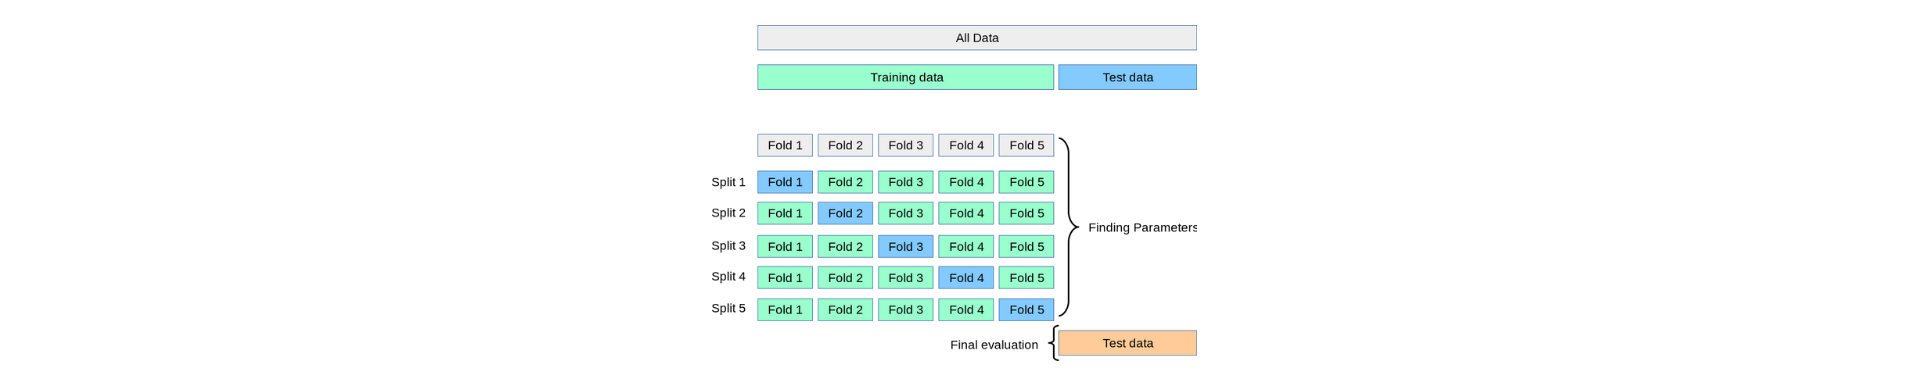

K yang di tetapkan adalah 5

Algoritma yang akan dilakukan Model Benchmarking yaitu Linear Regression, K Nearest Neighbour, Decission Tree, Random Forest, dan XGBoost. Kelima algoritma ini akan dilakukan K Fold cross check validation untuk mengetahui model dengan algoritma apa yang menghasilkan MAE dan MAPE terkecil secara <b>Robust</b>.

In [ ]:
# Model Algorithm
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

# Evaluation metric
mean_mape = []
mean_mae = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=101)

    estimator = Pipeline([
        ('preproces', transformer),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    mean_mae.append(model_cv_mae.mean())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    mean_mape.append(model_cv_mape.mean())

In [ ]:
# Compare 5 algorithm

df_eval = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', ],
    'Mean_MAE': mean_mae,
    'Mean_MAPE': mean_mape,
})
df_eval

,Model,Mean_MAE,Mean_MAPE
0,Linear Regression,-15773.807695,-0.273441
1,KNN Regressor,-14053.887702,-0.269096
2,DecisionTree Regressor,-15565.224712,-0.284301
3,RandomForest Regressor,-11442.649750,-0.196087
4,XGBoost Regressor,-10361.575861,-0.181167


Terlihat bahwa algoritma XGBoost dan RandomForest memiliki rata-rata MAE dan MAPE paling kecil diantara kelima algoritma. Algoritma RandomForest menghasilkan rata-rata MAE sebesar 11442 dan MAPE 19%, sedangkan algoritma XGBoost menghasilkan rata-rata MAE sebesar 10361 dan MAPE 18%. Oleh karena itu 2 algoritma yang akan digunakan untuk pengujian adalah algoritma RandomForest dan XGBoost.

### How Random Forest Works ?

Ide utama dari metode ini adalah hasil prediksi yang diambil dari lebih dari satu model cenderung lebih akurat daripada hasil prediksi dari satu model saja. Random Forest merupakan kumpulan dari Decission Tree, dimana setiap tree yang dihasilkan berasal dari sampling dataset (Bootstrapping) dan pengambilan fitur secara random (Feature Randomness). Sampling yang dilakukan biasanya memiliki ukuran yang sama seperti dataset asli, sehingga karena pengambilan dilakukan secara acak, beberapa item/obervasi mungkin duplikat.

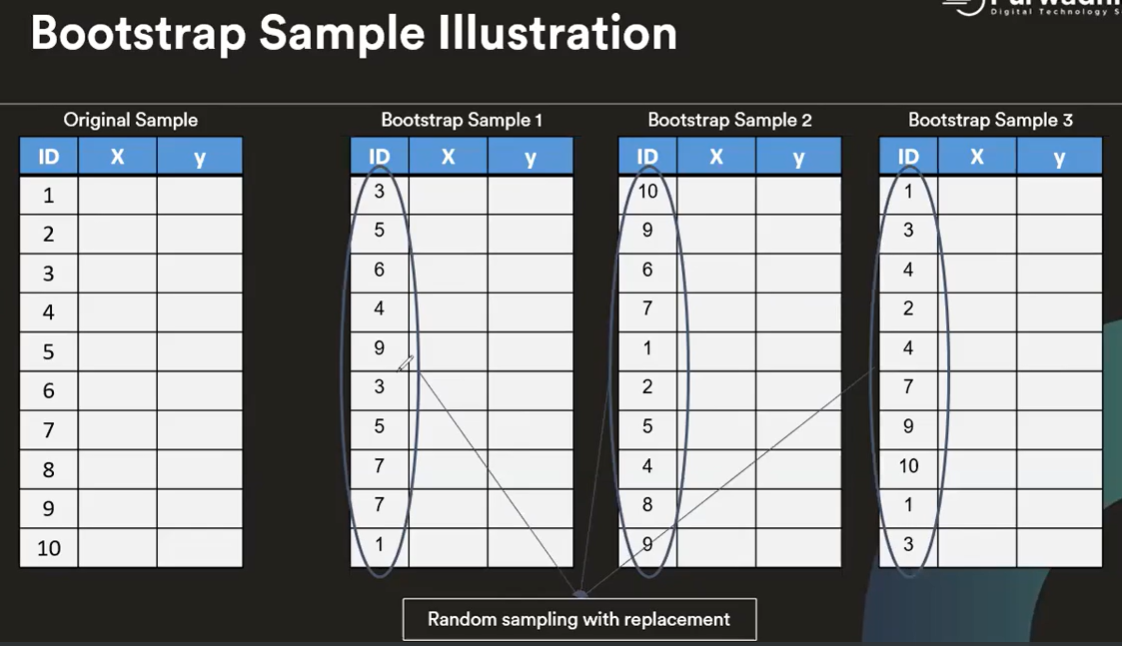

Namun pengambilan sample tetap memungkinkan untuk mengambil secara subset dari dataset demi efisiensi komputasi. Pada kasus Regresi, hasil akhir prediksi merupakan rata-rata dari angka prediksi dari setiap tree yang dihasilkan. 

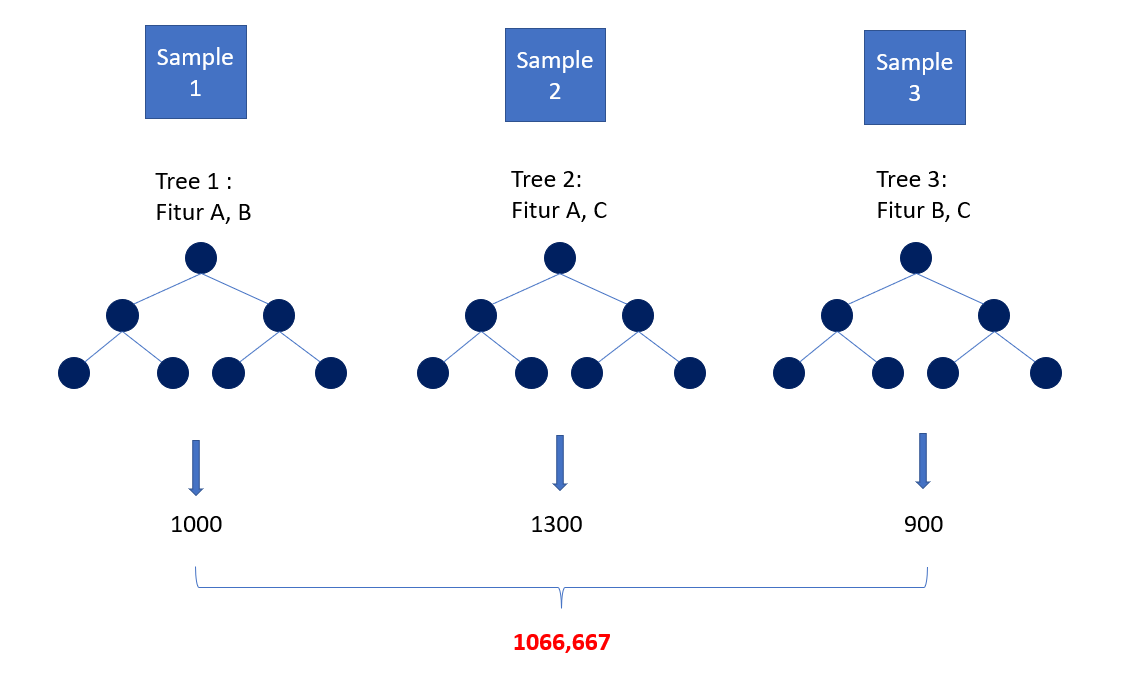

### How XGBoost (Extreme Gradient Boosting) Works ?

Tidak seperti Random Forest, metode boosting bergerak secara sekuensial. Algoritme ini memperbarui model (weak learner) dari prediksi yang salah. Gradient boosting menyesuaikan bobot dengan menggunakan menggunakan algoritme yang disebut Gradient Descent, yang secara iteratif mengoptimalkan loss (meminimalisir loss) dari model dengan memperbarui bobot. Loss biasanya diartikan sebagai skala perbedaan antara nilai prediksi dan nilai aktual. Pada kasus regresi, loss MSE (Mean Squared Error) digunakan sebagai metrik evaluasi.

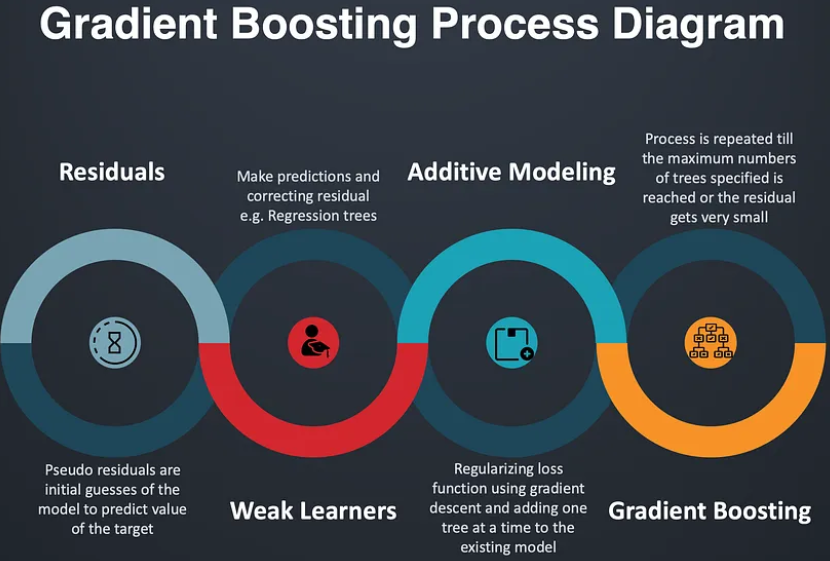

Gradient Boosting menggunakan <b>Additive Modelling</b> di mana Decission Tree baru ditambahkan satu per satu ke dalam model yang meminimalkan kerugian dengan menggunakan Gradient Descent. Tree yang sudah ada di dalam model tetap tidak tersentuh dan dengan demikian memperlambat laju overfitting. Output dari Tree baru digabungkan dengan output dari Tree yang sudah ada hingga kerugian diminimalkan di bawah Threshold atau batas Tree yang ditentukan.

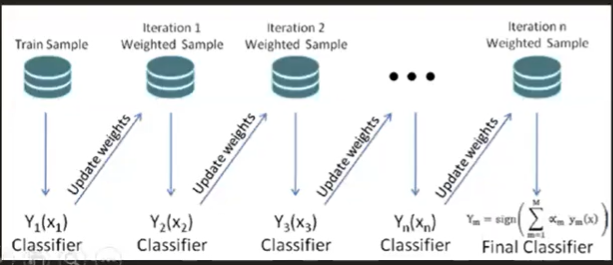

Extreme Gradient Boosting sendiri adalah enhancement dari metode Gradient Boosting, dimana pada metode ini terdapat Algorithm Enchancement yaitu <b>Tree Prunning</b> dan <b>Sparsity Aware Split Findings</b>.

## Testing

In [ ]:
# TEST MODEL

score_mae = []
score_mape = []

# Prediksi pada test set
for i in [xgb,rf]:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

test_eval = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape}, index=['XGB Regressor','Random Forest'])
test_eval

,MAE,MAPE
XGB Regressor,10219.313018,0.191745
Random Forest,10904.920330,0.203805


Ketika dilakukan pengujian pada data uji, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai MAE dan MAPE yang sedikit lebih rendah dari RandomForest. Mari kita lihat lebih detil bagaimana performa algoritma XGBoost ketika di uji.

In [ ]:
xgb_mae_score = []
xgb_mape_score = []

model_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)])

model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)

df_xgb = pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred
})

df_xgb['Residual'] = y_pred - y_test
df_xgb

,y_test,y_pred,Residual
722,43000,42080.207031,-919.792969
87,51000,43256.140625,-7743.859375
1277,38000,42612.523438,4612.523438
2505,65000,80645.179688,15645.179688
2303,100000,109811.843750,9811.843750
...,...,...,...
3583,127000,124603.609375,-2396.390625
2527,102000,118455.695312,16455.695312
2065,40000,40731.984375,731.984375
2177,26000,18810.917969,-7189.082031


In [ ]:
print(mean_absolute_error(y_test, y_pred))
xgb_mae_score.append(mean_absolute_error(y_test, y_pred))

10219.313017766834


Berdasarkan MAE, prediksi model dapat dikatakan meleset sebesar kurang lebih 10000 riyal (40,5 juta rupiah). Jika melihat angka tersebut, apabila kita menggunakan model prediksi ini untuk menentukan harga jual mobil, pastinya kita berkesimpulan bahwa model ini menghasilkan hasil prediksi yang buruk karena si penjual tentunya akan rugi secara kurang lebih 40,5 juta. Namun berapakah rata-rata harga aktual mobilnya ? apakah angka 10000 tersebut sudah dibandingkan dengan rata-rata harga aktual mobilnya ? lalu bagaimana hasilnya ? apakah kesimpulan masih tetap buruk, atau baik ? Kembali lagi pada pembahassan Evaluation Metric, kita tidak bisa menentukan baik buruknya performa model prediksi hanya cukup dengan MAE saja. Dibutuhkan evaluation metric yang memberikan skala agar baik dan buruknya suatu model dapat terdefinisikan secara jelas.

In [ ]:
print(mean_absolute_percentage_error(y_test, y_pred))
xgb_mape_score.append(mean_absolute_percentage_error(y_test, y_pred))

0.1917447210333834


Walaupun nilai MAE menunjukkan 10000, ternyata apabila dibandingkan dengan rata-rata harga aktual mobil, dalam skala persentase nyatanya error yang dihasilkan model hanya sebesar 19% saja, yang artinya prediksi harga akan meleset kurang lebih 19% dari aktual harga.

[Text(0.5, 1.0, 'Residual Distribution Plot')]

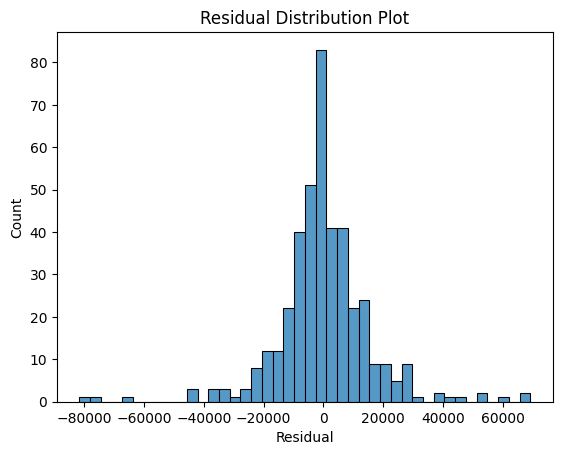

In [ ]:
sns.histplot(df_xgb['Residual']).set(title='Residual Distribution Plot')

terlihat dari distribusi residual terdapat nilai ektrem, artinya tidak semua item terprediksi secara akurat, terdapat beberapa items yang memiliki kesalahan yang sangat fatal. Karena perhitungan rata-rata sangat sensitif terhadap nilai ekstrem, hal ini menjadi alasan kenapa nilai MAE yang didapat itu tinggi. namun bukan berarti model ini menghasilkan hasil prediksi yang buruk.

In [ ]:
# Checking Highest Residual

df_xgb[abs(df_xgb['Residual']) == abs(df_xgb['Residual']).max()]

,y_test,y_pred,Residual
4586,125000,43394.609375,-81605.390625


faktanya tidak semua harga mobil terprediksi secara akurat, contohnya seperti item diatas yang mana harga prediksi jauh berbeda dengan harga aslinya. 

[Text(0.5, 1.0, 'Residual Vs y Aktual')]

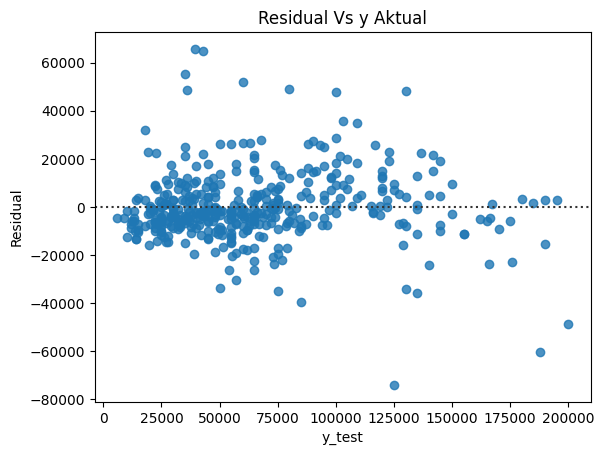

In [ ]:
sns.residplot(x='y_test', y='Residual', data=df_xgb).set(title='Residual Vs y Aktual')

dapat dibuktikan juga dari hasil visualisasi diatas bahwa beberapa plot sangat menjauhi garis 0 yang mengindikasikan bahwa kesalahan prediksi item tersebut dapat dikatakan sangat fatal.

## Hyperparameter Tuning

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [ ]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 1100,100))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0, 11)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# # Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
print(max_depth,learning_rate,n_estimators,subsample,gamma,colsample_bytree,reg_alpha)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99] [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] [0.001, 0.0027825594022071257, 0.007742636826811269, 0.021544346900318832, 0.05994842503189409, 0.1668100537200059, 0.46415888336127775, 1.2915496650148828, 3.593813663804626, 10.0]


In [ ]:
# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Optimisasi berdasarkan MAE, agar menurunkan tingkat kerugian penjualan
    random_state = 42  
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik

random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type']),
                                                                              ('scale',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model',
                                              XGBRegressor(base_score=0.5,
                                                           boo...
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [ ]:
# Cek skor dan params terbaik
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

Best_score: -10003.4117371985
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 10.0, 'model__n_estimators': 500, 'model__max_depth': 7, 'model__learning_rate': 0.04, 'model__gamma': 7, 'model__colsample_bytree': 0.7}


In [ ]:
# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
xgb_mae_score.append(mean_absolute_error(y_test, y_pred_xgb_tuning))
xgb_mape_score.append(mean_absolute_percentage_error(y_test, y_pred_xgb_tuning))


In [ ]:
pd.DataFrame({
    'MAE' : xgb_mae_score,
    'MAPE' : xgb_mape_score
},index=['Before Tuning','After Tuning'])

,MAE,MAPE
Before Tuning,10219.313018,0.191745
After Tuning,9403.370985,0.174309


Model mengalami peningkatan performa (MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning. Sebelum tunning, model dapat dikatakan menghasilkan prediksi yang meleset sebesar kurang lebih 10219 riyal (~41 juta rupiah), dan secara persentase prediksi harga akan meleset 19% dari aktual harga. Namun setelah tunning, model dapat dikatakan menghasilkan prediksi yang meleset sebesar kurang lebih 9403 riyal (~38 juta rupiah), dan secara persentase prediksi harga akan meleset 17% dari aktual harga.

In [ ]:
feature_names = np.concatenate([transformer.transformers_[0][1].get_feature_names(),transformer.transformers_[1][1].get_feature_names(),transformer.transformers_[2][2]])
feature_names


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\utils.py:360: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


array(['x0_Audi', 'x0_BMW', 'x0_Cadillac', 'x0_Changan', 'x0_Chevrolet',
       'x0_Chrysler', 'x0_Dodge', 'x0_Ford', 'x0_GMC', 'x0_Geely',
       'x0_Genesis', 'x0_Honda', 'x0_Hyundai', 'x0_Isuzu', 'x0_Jeep',
       'x0_Kia', 'x0_Land Rover', 'x0_Lexus', 'x0_MG', 'x0_Mazda',
       'x0_Mercedes', 'x0_Mitsubishi', 'x0_Nissan', 'x0_Others',
       'x0_Renault', 'x0_Toyota', 'x0_Volkswagen', 'x1_Automatic',
       'x1_Manual', 'x2_Gulf Arabic', 'x2_Other', 'x2_Saudi',
       'x2_Unknown', 'x3_Full', 'x3_Semi Full', 'x3_Standard', 'Type_0',
       'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5', 'Type_6',
       'Type_7', 'Type_8', 'Year', 'Engine_Size', 'Mileage'], dtype=object)

Sekarang mari kita cek fitur apa saja yang sangat memengaruhi harga jual dari mobil

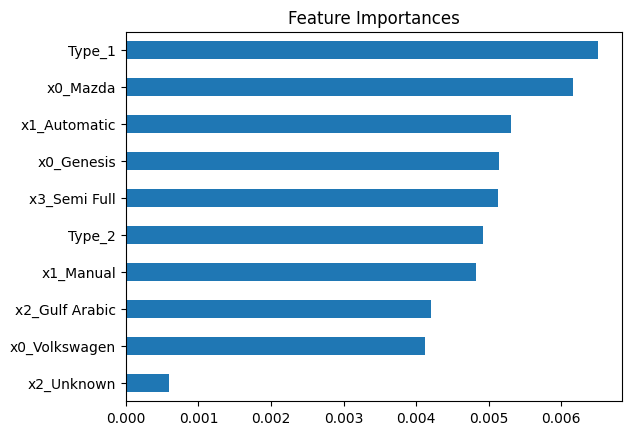

In [ ]:
# Check Feature Importance

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, feature_names).sort_values(ascending = True).head(10)
feature_imp.plot(kind='barh', title='Feature Importances');

# Kesimpulan

Berdasarkan proses data modeling, Analisis regresi berhasil dilakukan menggunakan pendekatan machine learning. Hal ini dapat dibuktikan dari performa model ketika menghasilkan nilai prediksi menghasilkan error yang kecil. Sehingga model dapat dijadikan solusi untuk rumusan masalah yang telah didefinisikan. Namun terdapat limitasi pada model yang telah dibangun, beberapa limitasi salah satunya adalah terbatasnya fitur dalam memprediksi harga mobil, sehingga model yang telah dibangun masih tergolong bias. Masih banyak spesifikasi-spesifikasi mobil yang dapat mempengaruhi Harga Jual mobil contohnya adalah kecacatan pada mobil. Selain limitasi fitur, model ini juga melimitasi rentang nilai pada fitur Price, Year, dan Mileage. Model akan menghasilkan nilai prediksi yang valid apabila harga jual mobil dalam rentang 5000 - 200000 riyal, rentang pembuatan mobil tahun 2000 - 2010, dan jarak tempuh yang tidak melebihi 575000 KM.

Namun diluar itu, secara keseluruhan Model ini masih bisa dikatagorikan sebagai model dengan performansi baik. Dari kelima algoritma, XGBoost merupakan algoritma terbaik dengan error terkecil dari baik dari sisi <i>robustness</i> maupun pengujian. Dengan menggunakan algoritma XGBoost, hasil prediksi dapat meleset sebesar kurang lebih 9403 riyal (~38 juta rupiah) dari harga aktual, dan secara persentase prediksi harga akan meleset kurang lebih 17% dari harga aktual.

Variabel Type dan Make secara akumulasi menjadi fitur yang paling berpengaruh terhadap harga mobil. 

# Rekomendasi/<i>Improvements</i>

Tentu saja, model ini dapat dilakukan peningkatan lebih lanjut untuk membuat hasil prediksi yang lebih baik. Salah satunya adalah memperbanyak jumlah dataset dan juga fitur. Jika mengingat kembali proses Data Preparation, jumlah records pada dataset yang telah dilakukan preprosesing hanya sebanyak 3445 baris saja. Jumlah dataset ini masih tergolong sedikit apabila dijadikan acuan pengambilan keputusan harga mobil untuk sebuah bisnis. Disamping itu variabel juga dapat ditambahkan agar menghindari model yang bias.

Selain itu, apabila kita berbicara soal teknis, kita dapat mencoba Deep Learning sebagai pendekatan lain yang dapat membantu analisis regresi. Bahkan kita dapat melakukan eksperimen dengan pendekatan yang berbeda, yaitu semi-supervised learning dengan mengelompokkan harga mobil yang bernilai 0 (efek variabel Negotiable). Pada saat data cleansing kita sepakat untuk menghapus mobil yang memiliki harga 0, Namun apa hasilnya jika kita tidak menghapusnya melainkan mengelompokannya berdasarkan spesifikasi-spesifikasi mobil yang terlihat mirip dan dihitung rata-ratanya untuk dijadikan harga-harga mobil yang bernilai 0 tersebut berdasarkan kelompoknya.
